In [64]:
import flopy 
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
import matplotlib
mpl.rcParams['figure.figsize'] = (8, 8)
os.getcwd()

'/Users/katie/Desktop/Freyberg_DA/daily_model_files_trnsprt_org'

In [220]:
# model_ws = '.'
model_ws = os.path.join('..','monthly_model_files_1lyr_trnsprt')

In [222]:
?flopy.mf6.MFSimulation.load

In [223]:
sim = flopy.mf6.MFSimulation.load(sim_ws = model_ws, verbosity_level=2)
m = sim.get_model("freyberg6")

loading simulation...
  loading simulation name file...
      loading block options...
        loading data continue...
      loading block timing...
        loading data tdis6...
      loading block models...
        loading data models...
      loading block exchanges...
        loading data exchanges...
      loading block solutiongroup...
        loading data mxiter...
        loading data solutiongroup...
  loading tdis package...
      loading block options...
        loading data time_units...
      loading block dimensions...
        loading data nper...
      loading block perioddata...
        loading data perioddata...
  loading model gwf6...
      loading block options...
        loading data list...
        loading data newtonoptions...
      loading block packages...
        loading data packages...
    loading package dis...
      loading block options...
        loading data length_units...
      loading block dimensions...
        loading data nlay...
        loading d

IndexError: list index out of range

In [211]:
fname = os.path.join(model_ws,'freyberg6_trns.ucn')
ucnobj = flopy.utils.HeadFile(fname, precision = 'double', text='CONCENTRATION')
times = ucnobj.get_times()
conc = ucnobj.get_alldata()

In [214]:
fname = os.path.join(model_ws,'freyberg6_trns.ucn')
ucnobj = flopy.utils.HeadFile(fname, precision = 'double', text='CONCENTRATION')
times = ucnobj.get_times()
conc = ucnobj.get_alldata()
conc[conc > 99999] = 'NaN'
conc[conc < 0.0001] = 'NaN'
c = conc[-1,0,:,:]

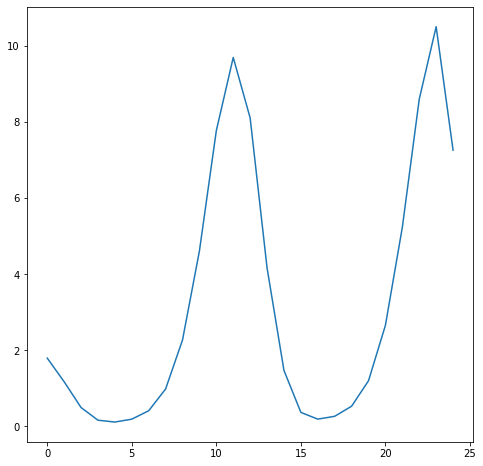

In [216]:
fname = os.path.join(model_ws,'freyberg6_trnsprt.cbs')
ucnobj = flopy.utils.HeadFile(fname, precision = 'double', text='CONCENTRATION')
times = ucnobj.get_times()
concs = ucnobj.get_alldata()
# conc[conc > 99999] = 'NaN'
# conc[conc < 0.0001] = 'NaN'
# b = conc[-1,0,:,:]
plt.plot(concs[:,0,:,39])

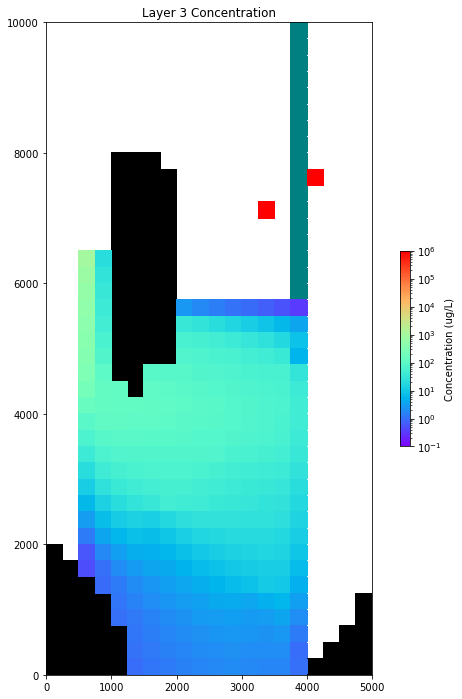

In [218]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('Layer 3 Concentration')
mapview = flopy.plot.PlotMapView(model=m, ax=ax, layer=0)
quadmesh = mapview.plot_bc('SFR')
quadmesh = mapview.plot_bc('WEL')
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(c,norm=matplotlib.colors.LogNorm(),cmap='rainbow')
quadmesh.set_clim(vmin=.1, vmax=1000000)
cb = plt.colorbar(quadmesh, shrink=.3, label='Concentration (ug/L)')